In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 

In [2]:
df = pd.read_csv("../DATA/titanic_preprocesamiento.csv")
df.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0


In [3]:
# Clasificación binaria
    # 0 - No sobrevivió
    # 1 - Sí sobrevivió
    
X = df.drop("Survived", axis=1)
X.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0


In [4]:
y = df["Survived"]

In [5]:
df["Survived"].value_counts()

Survived
0.0    535
1.0    341
Name: count, dtype: int64

## Regrasión Logística

* Parte lineal: similar a regresión lineal. Combina linealmente las columnas del dataframe: 
z = w0 + w21 * x1 + w2 * x2 + wn * wn

* w0: intercept
* w1: pesos que el modelo aprende

parte logística (función sigmoide)

sigmoide(z) = 1 /(1 + e ^ -z)

Esto nos da un número entre 0 y 1, que sería la probabilidad de pertenecer a la calse 0 o 1.
P( clase = 1 | k)

* Si la probabilidad es mayor a 0.5 entonces se clasifica como clase 1.
* Si la probabilidad es menor a 0.5 entonces se clasifica como clase 0.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay # Accuracy mide el rendimiento o exactitud

# LogisticRegression es un algoritmo de clasificación
# https://the-algorithms.com/es/algorithm/logistic-regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # Este es el particionamiento

model = LogisticRegression(max_iter=2000, C=0.2) # modelo

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))


[[99 16]
 [13 48]]


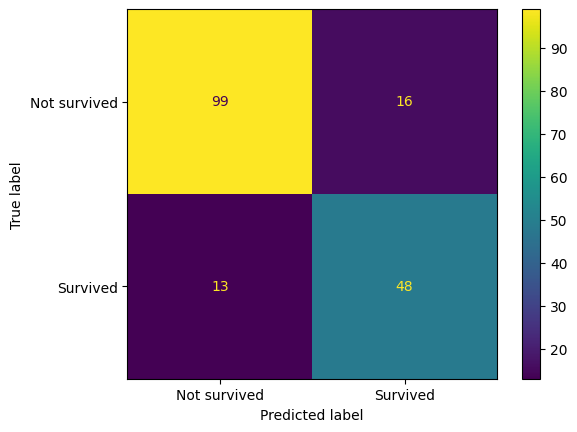

In [7]:
# para pintar la matriz
cm = confusion_matrix(y_test, y_pred)
# cmd = ConfusionMatrixDisplay(cm) para que en la representación no aparezcan los nombre en los ejes
cmd = ConfusionMatrixDisplay(cm, display_labels=["Not survived", "Survived"])
cmd.plot();

* 98 personas no sobrevivieron, y el modelo predice que no sobrevive (CORRECTO) -- VERDADERO POSITIVO (TP: true positive)
* 48 personas sobrevivieron, y el modelo predice que sobrevivieron (CORRECTO) -- VERDADERO NEGATIVO (TN: true negative)

In [8]:
from sklearn.metrics import classification_report

# Para la clase 1 (survived) el modelo tiene peores puntuaciones
# support indica el número de regsitros filas, hay que tener en cuenta que hemos hecho particionamientos del 20%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       115
         1.0       0.75      0.79      0.77        61

    accuracy                           0.84       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.84      0.84      0.84       176



### Accuracy:

Exactitud: porcentaje de muestras que el modelo clasifica correctamente (TN + TP).

accuracy = número de aciertos / número total de muestras

In [9]:
# exactitud, ratio de acierto
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

accuracy: 0.8352272727272727


### Precision

Precisión: de todas las observaciones que el modelo predijo como positivos, ¿cuántos son realmente positivos?

Enfocada a evitar falsos positivos.

Precisión: TP / TP + FP

In [10]:
from sklearn.metrics import precision_score 

precision_score(y_test, y_pred)

0.75

### Recall

Recall o sensibilidad: TP / TP + FN
Responde de los casos positivos reales, ¿qué proproción detecté correctamente?

In [11]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7868852459016393

### f1-score

Media de precisión y recall, tiene en cuenta ambas métricas, proporciona un balance entre ambas.

Es la métrica más confiable cuando tenemos datasets desbalanceados.

In [12]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.768

### ROC-AUC

Curva que ilustra el rendimiento del clasificador en distintos umbrales de decisión:
* TPR: True Positive Ratio
* FPR: False Positive Ratio

TPR = 1, FPR = 0, lo ideal

AUC: Area Under the Curve: cuantifica el área debajo de la curva ROC

* AUC = 1 perfecto
* AUC = 0.5 malo, igual que tomar una decisión aleatoria
* AUC < 0.5 peor que aleatorio, posible problema en el modelo

In [13]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f"AUC {auc}")

AUC 0.8238774055595153


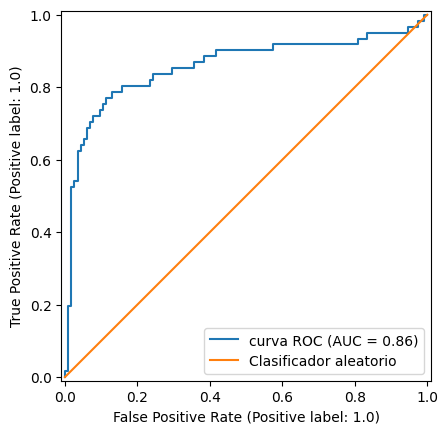

In [14]:
from sklearn.metrics import RocCurveDisplay

# Gráfico que muestra qué tan bien el modelo diferencia entre las clases
# Eje x: FPR tasa de falsos positivos
# Eje y: TPR tasa de verdaderos positivos
# Nos interesa que la diagonal esté en (0,0)
# FPR si es 0 es ideal, cuanto mayor es FPR peor y más curva se hace la línea
# TPR es 1 es ideal
# Interpretación: cuanto más cerca de la esquina superior izquierda MEJOR
RocCurveDisplay.from_estimator(model, X_test, y_test, name="curva ROC");
plt.plot([0, 1], [0, 1], label="Clasificador aleatorio")
plt.legend();

In [15]:
model.predict(X_test)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [16]:
model.predict_proba(X_test) # Probabilidad en una raíz de arrays. Probabilidad estimada.

array([[0.3026909 , 0.6973091 ],
       [0.8486708 , 0.1513292 ],
       [0.65005316, 0.34994684],
       [0.8742781 , 0.1257219 ],
       [0.81973116, 0.18026884],
       [0.10962072, 0.89037928],
       [0.83377094, 0.16622906],
       [0.57245842, 0.42754158],
       [0.89774495, 0.10225505],
       [0.57420371, 0.42579629],
       [0.3998182 , 0.6001818 ],
       [0.40456975, 0.59543025],
       [0.75910754, 0.24089246],
       [0.5738596 , 0.4261404 ],
       [0.78489394, 0.21510606],
       [0.42723275, 0.57276725],
       [0.54445547, 0.45554453],
       [0.57224226, 0.42775774],
       [0.31157651, 0.68842349],
       [0.14319529, 0.85680471],
       [0.83593471, 0.16406529],
       [0.86425213, 0.13574787],
       [0.80099098, 0.19900902],
       [0.3474469 , 0.6525531 ],
       [0.9183904 , 0.0816096 ],
       [0.89231487, 0.10768513],
       [0.85072325, 0.14927675],
       [0.38192007, 0.61807993],
       [0.43918288, 0.56081712],
       [0.86252466, 0.13747534],
       [0.

In [17]:
model.classes_

array([0., 1.])

In [18]:
X_new = pd.DataFrame([[22.0,3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
X_new

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0


In [19]:
model.predict(X_new) # 0 no sobrevivió

array([0.])

In [20]:
# 87,5% de probabilidad de que no haya sobrevivido
# 12,42% de probabilidad de que sí haya sobrevivido
model.predict_proba(X_new)

array([[0.85944892, 0.14055108]])

In [21]:
model.intercept_

array([3.17424311])

In [22]:
model.coef_

array([[-0.04799952, -1.01726433, -0.3566783 , -0.1112087 , -0.00216403,
         1.14718709, -1.14140647,  0.39639309, -0.10436136,  0.06498837,
        -0.11191646]])

### Comparar modelos de clasificación

In [23]:
df_resultados = pd.DataFrame(columns=["Modelo", "accuracy","precision", "recall", "f1", "AUC"])

In [24]:
model = LogisticRegression(max_iter=1000, C=0.01)
def calculate_metrics(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]

In [25]:
model = LogisticRegression(max_iter=1000, C=0.01)
calculate_metrics("RL", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436


In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
calculate_metrics("KNN k = 3", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237


In [27]:
model = KNeighborsClassifier(n_neighbors=5)
calculate_metrics("KNN k = 5", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869


Text(0.5, 0, 'k n_neighbors')

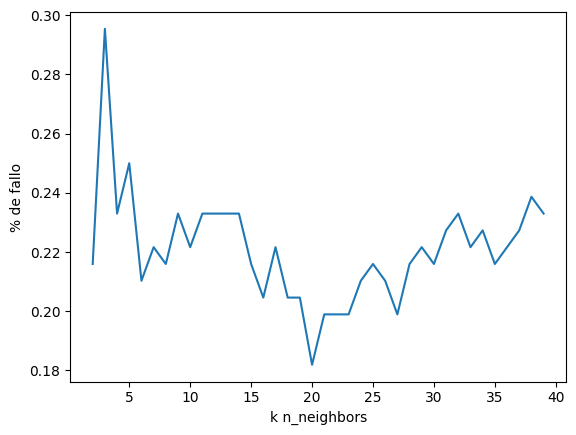

In [28]:
# elbow method oel método del codo
errors = []
for k in range(2, 40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    errors.append(error)

plt.plot(range(2, 40), errors)
plt.ylabel("% de fallo")
plt.xlabel("k n_neighbors")

In [29]:
model = KNeighborsClassifier(n_neighbors=20)
calculate_metrics("KNN k = 20", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496


## Árbol de decisión

Al ser clasificación usa criterion = "gini" por defecto.

Parámetros:
* criterion: 
    * Gini(por defecto)

        Gini = 0 significa que el nodo es completamente puro, contiene datos de una sola clase.

        Gini > 0 indica que hay mezcla de clases, Cuanto mayor sea el valor mayor será la impureza.

        Gini es una medida de impureza o mezcla de clases en un nodo de un árbol. Propósito: evaluar qué tan puras son las divisiones en un nodo.
    * entropy:
        Entropy = 0 significa que el nodo es completamente puro, contiene datos de una sola clase.
        Entropy > 0 indica que hay mezcla de clases. Cuanto mayor sea el valor, mayor será la impureza o la incertidumbre.
        Entropy es una medida de incertidumbre o desorden en un nodo de un árbol.
        Más lento, pero puede ser útil cuando las clases están desbalanceadas.

* max_depth
* min_samples_split: número de muestras que deben hacer en un nodo antes de intentar dividirlo. Mínimo de muestras para difivir un nodo.
* min_samples_split: mínimo de muestras que debe haber en un nodo hijo.
* max_features: número máximo de columnas X consideradas en cada división. Ideal se hay muchas columnas y algunas d ellas son irrelevantes.

Atributos
feature_importances_: importancia de cada columna en la X a la hora de hacer la partición, se calcula usando la impureza.
* classes_
* tree_
* get_depth()

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8)
calculate_metrics("DT", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724


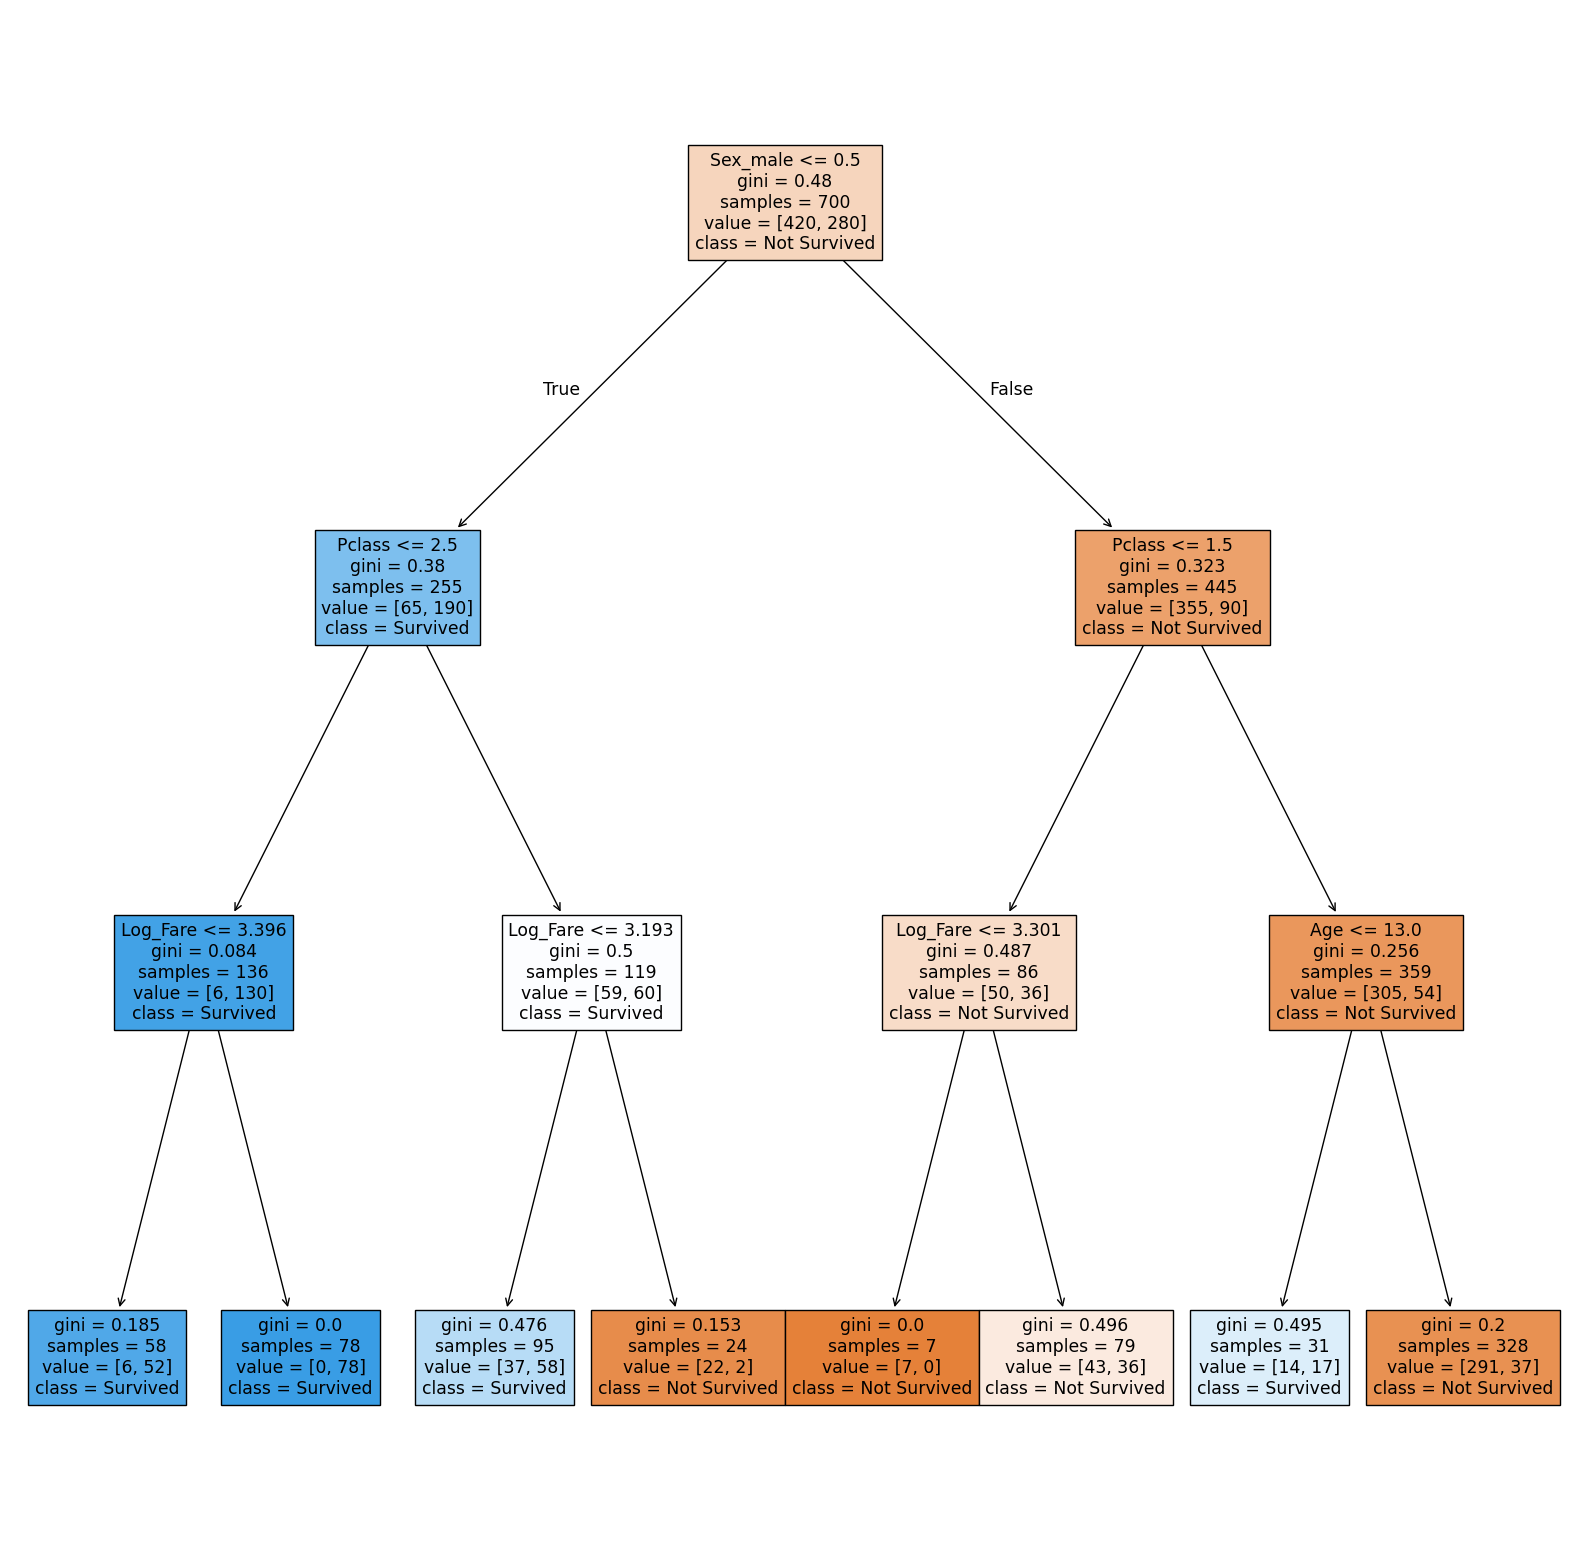

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
plot_tree(model, filled=True, class_names=["Not Survived", "Survived"], feature_names=X.columns);

In [36]:
# un array con una importance por cada columna en X
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.14597151647904558
Columna: Pclass Importancia: 0.12704576843749912
Columna: Ticket Importancia: 0.06804838754912411
Columna: Sibsp Importancia: 0.021411492257739785
Columna: Parch Importancia: 0.01686512008589866
Columna: Sex_female Importancia: 0.2365418955264272
Columna: Sex_male Importancia: 0.2031024897760991
Columna: Log_Fare Importancia: 0.15176074931713923
Columna: Embark_Town_Cherbourg Importancia: 0.006651478077230092
Columna: Embark_Town_Queenstown Importancia: 0.01229140423882295
Columna: Embark_Town_Southampton Importancia: 0.010309698254974076


In [32]:
model = DecisionTreeClassifier(max_depth=10)
calculate_metrics("DT depth 10", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724
5,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029


In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=20)
calculate_metrics("RF 200", model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724
5,DT depth 10,0.835227,0.758065,0.770492,0.764228,0.820029
6,RF 200,0.846591,0.774194,0.786885,0.780488,0.832573


In [37]:
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.14597151647904558
Columna: Pclass Importancia: 0.12704576843749912
Columna: Ticket Importancia: 0.06804838754912411
Columna: Sibsp Importancia: 0.021411492257739785
Columna: Parch Importancia: 0.01686512008589866
Columna: Sex_female Importancia: 0.2365418955264272
Columna: Sex_male Importancia: 0.2031024897760991
Columna: Log_Fare Importancia: 0.15176074931713923
Columna: Embark_Town_Cherbourg Importancia: 0.006651478077230092
Columna: Embark_Town_Queenstown Importancia: 0.01229140423882295
Columna: Embark_Town_Southampton Importancia: 0.010309698254974076


In [34]:
# Clasificación multiclase